<a href="https://colab.research.google.com/github/sahithip4/AI/blob/main/ExploratoryDataAnalysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basics**

In [ ]:
import pandas as pd

In [ ]:
filepath = 'https://raw.githubusercontent.com/sahithip4/AI/main/housing.csv'

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
df.longitude.mean()

-119.56970445736432

In [ ]:
df.housing_median_age.mean()

28.639486434108527

In [ ]:
df.population.median()

1166.0

In [ ]:
df.total_bedrooms.mode()

0    280.0
Name: total_bedrooms, dtype: float64

In [ ]:
df.ocean_proximity.mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Missing Values**

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# **Data Dispersion**

**Variance**

In [ ]:
df.total_rooms.var()

4759445.105938661

In [ ]:
df.households.var()

146176.03990028054

**Standard Deviation**

In [ ]:
df.total_rooms.std()

2181.615251582795

In [ ]:
df.households.std()

382.32975283161073

**IQR**

In [ ]:
q1 = df.total_rooms.quantile(0.25)
q3 = df.total_rooms.quantile(0.75)
IQR = q3 - q1
IQR

1700.25

# **Data Distribution**

In [ ]:
import seaborn as sns

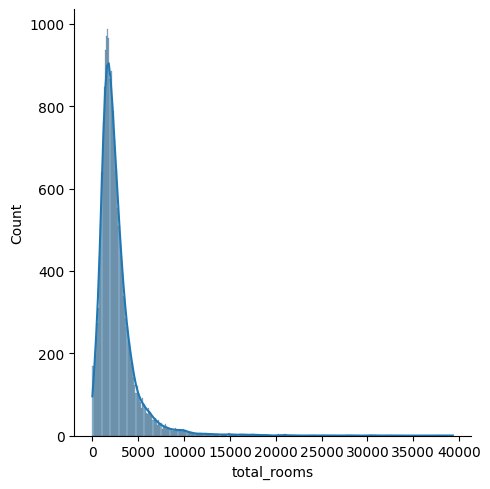

In [ ]:
sns.displot(df.total_rooms, kde=True) #kde is k density estimator

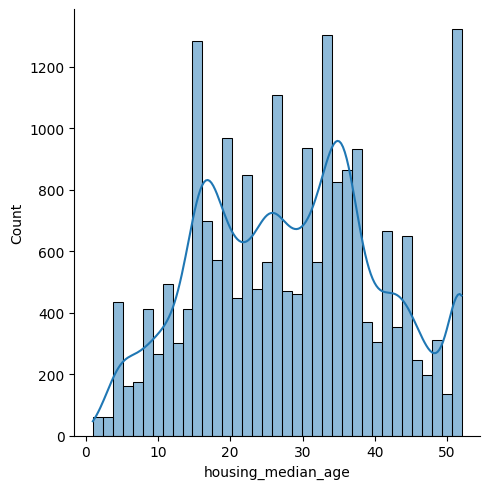

In [ ]:
sns.displot(df.housing_median_age, kde = True)

# **Finding Outliers**

Using **Standard Deviation**

In [ ]:
std = df.population.std()

In [ ]:
lower_limit = df.population.mean() - 3*std
upper_limit = df.population.mean() + 3*std

In [ ]:
outliers = df.population[(df.population <lower_limit)|(df.population > upper_limit)]

In [ ]:
outliers.shape

(342,)

In [ ]:
population_wo_outliers = df.population[(df.population >= lower_limit) & (df.population <= upper_limit) ]


In [ ]:
population_wo_outliers.shape

(20298,)

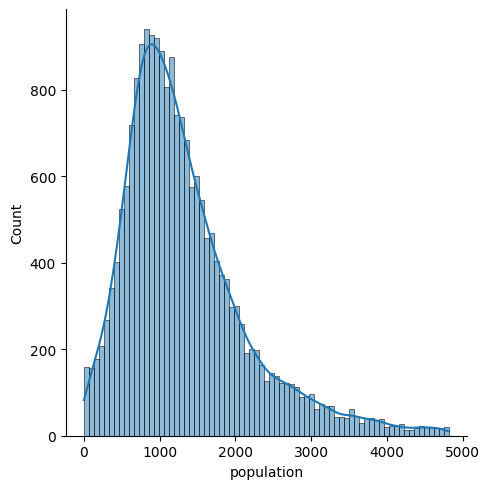

In [ ]:
sns.displot(population_wo_outliers, kde = True)

Using **IQR**

In [ ]:
q1 = df.population.quantile(0.25)
q3 = df.population.quantile(0.75)
IQR = q3 - q1
IQR

938.0

In [ ]:
population_wo_outliers_iqr = df.population[(df.population > (q1 - 1.5*IQR)) & (df.population < (q3 + 1.5*IQR))]

In [ ]:
population_wo_outliers_iqr.shape

(19442,)

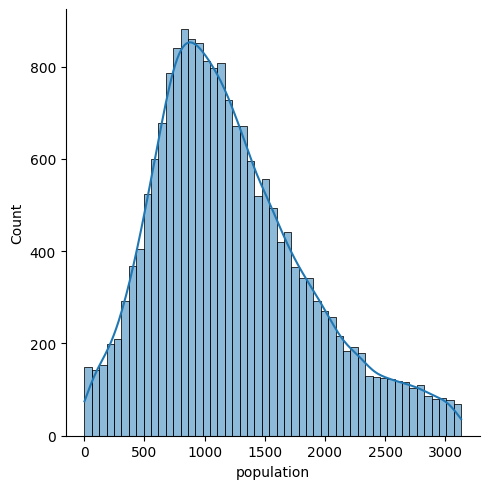

In [ ]:
sns.displot(population_wo_outliers_iqr, kde = True)

**Visualizing Outliers using Boxplot**

<Axes: ylabel='population'>

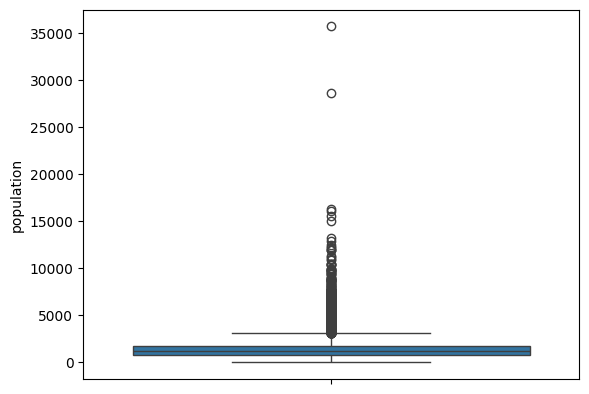

In [ ]:
sns.boxplot(data = df.population)

The outliers in the above plot are actually populations of big cities, so we gotta be careful with whether we remove the outliers or not

<Axes: ylabel='housing_median_age'>

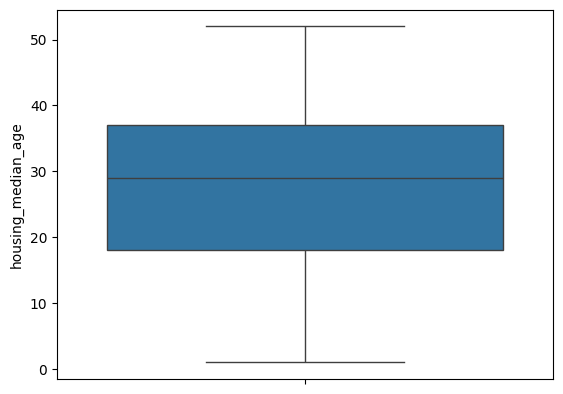

In [ ]:
sns.boxplot(data = df.housing_median_age)

# **Skewness**

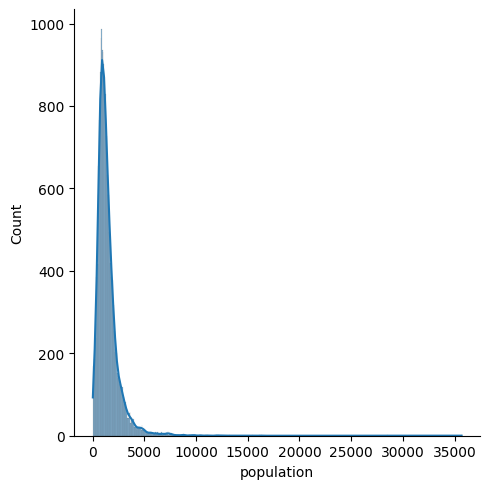

In [ ]:
sns.displot(df.population, kde = True)

In [ ]:
df.population.skew()

4.93585822672712

#### **Data Transformation**

In [ ]:
import numpy as np

In [ ]:
np.log(df.population)

0        5.774552
1        7.783641
2        6.206576
3        6.324359
4        6.336826
           ...   
20635    6.739337
20636    5.874931
20637    6.914731
20638    6.608001
20639    7.234898
Name: population, Length: 20640, dtype: float64

In [ ]:
np.log(df.population).skew()

-1.070786100914493

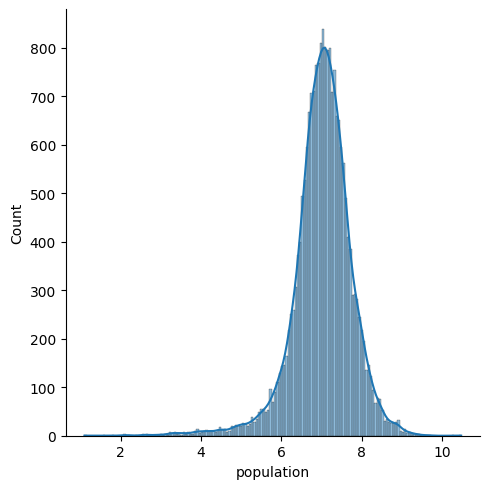

In [ ]:
sns.displot(np.log(df.population), kde = True)

In [ ]:
q1 = np.log(df.population).quantile(0.25)
q3 = np.log(df.population).quantile(0.75)
IQR = q3 - q1
IQR

0.7847540810480567

In [ ]:
population_wo_outliers_iqr_log = np.log(df.population)[(np.log(df.population) > (q1 - 1.5*IQR)) & (np.log(df.population) < (q3 + 1.5*IQR))]

In [ ]:
population_wo_outliers_iqr_log.shape

(19793,)